In [1]:
import sys
import os
import numpy as np
import math as m
utils_path=os.path.abspath("../")
sys.path.append(utils_path)
utils_path=os.path.abspath("../utils")
sys.path.append(utils_path)
from utils import random_hash
from utils import random_hash_tables as rht
from utils import near_neighbors as nn
from utils import preprocess as prep
%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(10)
preprocessing = prep.Preprocess("../ml-latest-small/ratings.csv")
preprocessing.preprocess_ratings_np(0.5)
vectors = preprocessing.threshold_ratings_array
ratings_vectors = preprocessing.ratings_array
(nbUsers,nbItems) = vectors.shape 

print(vectors.shape)

nbBands = 50
nbRows = 10

lsh = rht.LSH(nbBands,nbRows,nbItems)

#lsh.__getitem__(vectors[0],0)
#print("lsh.signatures 1")
#print(lsh.signatures)
#print("set")
#lsh.__setitem__(vectors[0],0)
#print("lsh.signatures 2")
#print(lsh.signatures)
#print("get")
#lsh.__getitem__(vectors[0],0)

nn.fill_buckets(vectors,lsh)
#for i in range(1):
#    print(lsh.signatures[i])
#
#for i in range(1):
#    print(lsh.hash_tables[i].hash_table)

Removing 0 irrelevent users
(610, 9724)


0

In [3]:
np.random.seed(10)
preprocessing = prep.Preprocess("../ml-latest-small/ratings.csv")
preprocessing.preprocess_ratings_np(0.5)
vectors = preprocessing.threshold_ratings_array
ratings_vectors = preprocessing.ratings_array
(nbUsers,nbItems) = vectors.shape 

print(vectors.shape)

nbBands = 50
nbRows = 10

lsh = rht.LSH(nbBands,nbRows,nbItems)
"""near_neighbor_prediction(vectors,1,3,lsh)"""
"""similitude = pearson(uncompleteVectors,1,4)
print(similitude)"""

#hash_table = lsh.hash_tables["2"]
#hash_table.generate_hash(vectors[90])
#nn.fill_buckets(vectors,lsh)
#for i in range(4):
#    print(lsh.hash_tables[str(i)].hash_table) 
#print(search_similar_vectors(vectors,1,lsh))

#print(nn.pearson(ratings_vectors,5,534))

#a = np.array([True,False,False,False,True,True])
#b = np.array([True,True,True,False,True,False])
#nn.jaccard(a,b)
#print(np.where(ratings_vectors[300] != 0))
#print(ratings_vectors[300][1871])

userIdx = 300
itemIdx = 925

prediction = nn.near_neighbor_prediction(preprocessing,userIdx,itemIdx,lsh,"jaccard")
print("prediction")
print(prediction)
print("real value")
print(ratings_vectors[userIdx][itemIdx]/2)

#(best_band,best_bandIdx,errors) = find_best_band_for_row(bandRange,row,vectors,userIdx,itemIdx)

#print(best_band)
#print(best_bandIdx)
#print(errors)

Removing 0 irrelevent users
(610, 9724)
prediction
4.05330322066044
real value
4.5


Test several parameters

In [15]:
from utils import test_parameters as test

np.random.seed(49)
preprocessing = prep.Preprocess("../ml-latest-small/ratings.csv")
preprocessing.preprocess_ratings_np(0.5)
vectors = preprocessing.threshold_ratings_array
ratings_vectors = preprocessing.ratings_array
(nbUsers,nbItems) = vectors.shape 

print(vectors.shape)

test_data_set = test.generate_test_data_set(ratings_vectors)

print(test_data_set[500:510])
print([ratings_vectors[test_data_set[i][0]][test_data_set[i][1]] for i in range(500,510)])

test_data_set = test_data_set[200:203]


Removing 0 irrelevent users
(610, 9724)
[[ 500 9723    6]
 [ 501 9723    2]
 [ 502 9723    7]
 [ 503 9723    8]
 [ 504 9723    7]
 [ 505 4931    6]
 [ 506 9723    6]
 [ 507 9723    4]
 [ 508 7023    7]
 [ 509 1796    9]]
[0, 0, 0, 0, 0, 0, 0, 0, 7, 0]


In [35]:
np.random.seed(10)

lenSignatures = 32
nbTables = 30

signaturesArray = test.generate_signatures_tables(nbTables,vectors,lenSignatures)



not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using signatures
not using sig

In [36]:
np.random.seed(10)

(bestError,bestRows,meanGlobalErrorArray) = test.test_band_range(nbTables,preprocessing,signaturesArray,test_data_set,lenSignatures)

print("bestError")
print(bestError)
print("bestRows")
print(2**bestRows)
print("meanGlobalErrorArray")
print(meanGlobalErrorArray)


nbRows
1
predictions
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
realValue/2.
5.0
predictions
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
realValue/2.
4.0
predictions
[2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846, 2.806824267408846]
realValue/2.
5.0
nbRows
2
predictions
[4.0, 4.0,

[1, 2, 4, 8, 16, 32]


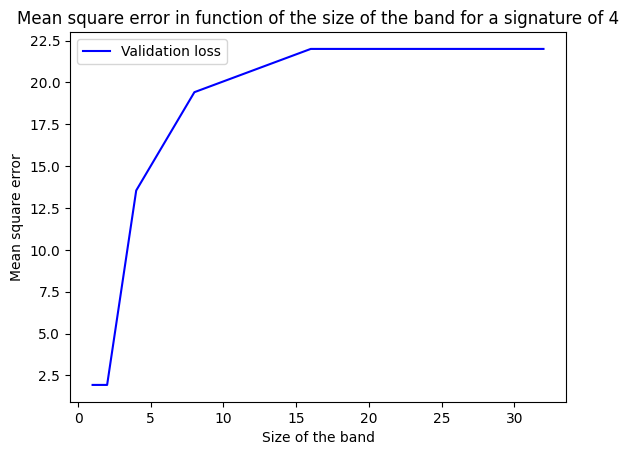

In [32]:
import matplotlib.pyplot as plt

rows = []
i = 0
while 2**i <= lenSignatures:
    rows.append(2**i)
    i += 1

print(rows)

plt.plot(rows, meanGlobalErrorArray, 'b', label='Validation loss')
plt.title('Mean square error in function of the size of the band for a signature of 4')
plt.xlabel('Size of the band')
plt.ylabel('Mean square error')
plt.legend()
plt.show()